# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

## venn3

In [4]:
def peak_overlap_venn3(peak1,
                       peak2,
                       peak3,
                       label1='A',
                       label2='B',
                       label3='C',
                       title='Title',
                       col1='C1',
                       col2='C2',
                       col3='C3',
                       output_file=None):
    import subprocess
    from matplotlib_venn import venn3
    from matplotlib_venn._common import mix_colors
    from matplotlib.colors import ColorConverter
    a = int(
        subprocess.check_output(
            f'wc -l {peak1}'.split()).decode().strip().split()[0])
    b = int(
        subprocess.check_output(
            f'wc -l {peak2}'.split()).decode().strip().split()[0])
    c = int(
        subprocess.check_output(
            f'wc -l {peak3}'.split()).decode().strip().split()[0])
    ab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | wc -l',
            shell=True).decode().strip())
    ba = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak1} | wc -l',
            shell=True).decode().strip())
    ac = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak3} | wc -l',
            shell=True).decode().strip())
    ca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | wc -l',
            shell=True).decode().strip())
    bc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | wc -l',
            shell=True).decode().strip())
    cb = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak2} | wc -l',
            shell=True).decode().strip())
    abc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())
    bca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    cab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())
    intersect_ab = (ab + ba) >> 1
    intersect_ac = (ac + ca) >> 1
    intersect_cb = (cb + bc) >> 1
    intersect_abc = (abc + bca + cab) // 3
    print(a - intersect_ab - intersect_ac + intersect_abc,
          b - intersect_ab - intersect_cb + intersect_abc,
          intersect_ab - intersect_abc,
          c - intersect_ac - intersect_cb + intersect_abc,
          intersect_ac - intersect_abc, intersect_cb - intersect_abc,
          intersect_abc)
    v = venn3(
        (a - intersect_ab - intersect_ac + intersect_abc, b - intersect_ab -
         intersect_cb + intersect_abc, intersect_ab - intersect_abc,
         c - intersect_ac - intersect_cb + intersect_abc, intersect_ac -
         intersect_abc, intersect_cb - intersect_abc, intersect_abc),
        set_colors=(col1, col2, col3),
        alpha=.5,
        set_labels=(label1, label2, label3))
    #if a - intersect_ab - intersect_ac + intersect_abc > 0:
    #    v.get_label_by_id('100').set_text(
    #        f'{a - intersect_ab - intersect_ac + intersect_abc:,}')
    #if b - intersect_ab - intersect_cb + intersect_abc > 0:
    #    v.get_label_by_id('010').set_text(
    #        f'{b - intersect_ab - intersect_cb + intersect_abc:,}')
    #if intersect_ab - intersect_abc > 0:
    #    v.get_label_by_id('110').set_text(f'{intersect_ab - intersect_abc:,}')
    #if c - intersect_ac - intersect_cb + intersect_abc > 0:
    #    v.get_label_by_id('001').set_text(
    #        f'{c - intersect_ac - intersect_cb + intersect_abc:,}')
    #if intersect_ac - intersect_abc > 0:
    #    v.get_label_by_id('101').set_text(f'{intersect_ac - intersect_abc:,}')
    #if intersect_cb - intersect_abc > 0:
    #    v.get_label_by_id('011').set_text(f'{intersect_cb - intersect_abc:,}')
    #if intersect_abc > 0:
    #    v.get_label_by_id('111').set_text(f'{intersect_abc:,}')
    if output_file:
        plt.title(title)
        plt.savefig(output_file, transparent=True)
        plt.close()

## load data function

In [2]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

## make_Ramp

In [5]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

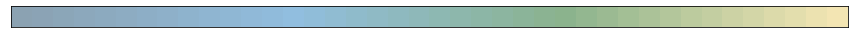

In [6]:
my_cmap_4 = make_Ramp(['#8BA2B2', '#91BEDF', '#8BB38D', '#F4E6B3'])

## box plot

In [8]:
from seaborn.categorical import _BoxPlotter


class box_plotter(_BoxPlotter):
    def add_statistic_annotate(self, ax, x1, x2, y, h, value, text_type,
                               **kws):
        default_lw = mpl.rcParams["patch.linewidth"]
        lw = kws.get("linewidth", kws.get("lw", default_lw))
        width = x2 - x1
#         x1, x2 = x1 + .1 * width, x2 - .1 * width
#         x1, x2 = x1 + .5, x2 - .5
        ax.plot([x1, x1, x2, x2], [y + .5 * h, y + h, y + h, y + .5 * h],
                lw=1.5,
                c='k')
        if text_type == 'raw':
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    f'P = {value:.2e}',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.05:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    'n.s.',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.01:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    '*',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.001:
            ax.text((x1 + x2) * .5,
                    y_ + h * 1.5,
                    '**',
                    ha='center',
                    va='bottom',
                    color='k')
        else:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    '***',
                    ha='center',
                    va='bottom',
                    color='k')

    def draw_statistic_annotate(self, ax, centerCol, **kwargs):
        from operator import methodcaller
        from scipy import stats
        if kwargs.get('statistic_test') == 'mannwhitneyu':
            statistic_kwargs = {
                'use_continuity': kwargs.get('use_continuity', True),
                'alternative': kwargs.get('alternative', None)
            }
        elif kwargs.get('statistic_test') == 'wilcoxon':
            statistic_kwargs = {
                'zero_method': kwargs.get('zero_method', 'wilcox'),
                'correction': kwargs.get('correction', False),
                'alternative': kwargs.get('alternative', 'two-sided')
            }
        elif kwargs.get('statistic_test') == 'ttest_ind':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'equal_var': kwargs.get('equal_var', True),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        elif kwargs.get('statistic_test') == 'ttest_rel':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        else:
            raise ValueError(
                'statistic_test must be either mannwhitneyu, wilcoxon, ttest_ind or ttest_rel.'
            )
        ylim = ax.get_ylim()
        h = .05 * (ylim[1] - ylim[0])
#         print(self.plot_hues)
        if self.plot_hues is None:
            if centerCol == None :
                for i in range(len(self.plot_data) - 1):
                    pvalue = methodcaller(kwargs.get('statistic_test'),
                                          self.plot_data[i], self.plot_data[i + 1],
                                          **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i + 1])[0]['whishi']) + .25 * h
                    self.add_statistic_annotate(ax,
                                                i,
                                                i + 1,
                                                y,
                                                h,
                                                pvalue,
                                                text_type=kwargs.get(
                                                    'text_type', 'raw'))
            else :
                for i in range(len(self.plot_data)):
                    if i != centerCol :
                        pvalue = methodcaller(kwargs.get('statistic_test'),
                                              self.plot_data[i], self.plot_data[centerCol],
                                              **statistic_kwargs)(stats).pvalue
                        y = max(
                            mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                            mpl.cbook.boxplot_stats(
                                self.plot_data[centerCol])[0]['whishi']) + 2 * h * i
                        self.add_statistic_annotate(ax,
                                                    i,
                                                    centerCol,
                                                    y,
                                                    h,
                                                    pvalue,
                                                    text_type=kwargs.get(
                                                        'text_type', 'raw'))
                    
        else:
            for i in range(len(self.plot_data)):
                offsets = self.hue_offsets
                for j in range(len(self.hue_names) - 1):
                    pvalue = methodcaller(
                        kwargs.get('statistic_test'), self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j]],
                        self.plot_data[i][self.plot_hues[i] == self.hue_names[
                            j + 1]], **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i][self.plot_hues[i] ==
                                              self.hue_names[j]])[0]['whishi'],
                        mpl.cbook.boxplot_stats(self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j + 1]])[0]
                        ['whishi']) + .25 * h
                    self.add_statistic_annotate(ax,
                                                i + offsets[j],
                                                i + offsets[j + 1],
                                                y,
                                                h,
                                                pvalue,
                                                text_type=kwargs.get(
                                                    'text_type', 'raw'))
    
        ax.set_ylim(ylim[0], ylim[1] + 2.5 * h)


def boxplot(x=None,
            y=None,
            hue=None,
            data=None,
            order=None,
            hue_order=None,
            orient=None,
            color=None,
            palette=None,
            saturation=0.75,
            width=0.8,
            dodge=True,
            fliersize=5,
            linewidth=None,
            whis=1.5,
            ax=None,
            statistic_args=None,
            centerCol=None,
            **kwargs):
    plotter = box_plotter(x, y, hue, data, order, hue_order, orient, color,
                          palette, saturation, width, dodge, fliersize,
                          linewidth)
    if ax is None:
        ax = plt.gca()
    kwargs.update(dict(whis=whis))
    plotter.draw_boxplot(ax, kwargs)
    plotter.annotate_axes(ax)
    if statistic_args:
        kwargs = statistic_args
        plotter.draw_statistic_annotate(ax, centerCol, **kwargs)
    if plotter.orient == "h":
        ax.invert_yaxis()

# 1e5 v.s. 1e4 v.s. 1e3

In [40]:
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison")

## venn plot -- Fig.2C S3C 

In [250]:
peak_overlap_venn3(
    'ATF1_1e5_excludeIgG_filtered_peaks.narrowPeak',
    'ATF1_1e4_excludeIgG_filtered_peaks.narrowPeak',
    'ATF1_5e3_excludeIgG_filtered_peaks.narrowPeak',
    label1='1e5',
    label2='1e4',
    label3='5e3',
    title = 'ATF1 peak numbers',
    col1='#98BDD8',
    col2='#92AC93',
    col3='#6F7B88',
    output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig3C_Venn3_reduceInput_ATF1.pdf')

11698 113 3230 14 6 18 525


In [251]:
peak_overlap_venn3(
    'ELF1_1e5_excludeIgG_filtered_peaks.narrowPeak',
    'ELF1_1e4_excludeIgG_filtered_peaks.narrowPeak',
    'ELF1_5e3_excludeIgG_filtered_peaks.narrowPeak',
    label1='1e5',
    label2='1e4',
    label3='5e3',
    title = 'ELF1 peak numbers',
    col1='#98BDD8',
    col2='#92AC93',
    col3='#6F7B88',
    output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig2C_Venn3_reduceInput_ELF1.pdf')

12229 421 4150 16 18 34 1445


## scatter plot -- Fig.2B S3B S3E S3F

In [133]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/reduceInput_corr')

### FitCR

In [134]:
# load promoter
import subprocess
cmd = '''grep NM ~/source/bySpecies/hg38/refGene/hg38.refGene.genePredExt | awk '{if($3=="+") print $2"\t"$4-3000"\t"$4+3000"\t"$1"\t0\t"$3; else print $2"\t"$5-3000"\t"$5+3000"\t"$1"\t0\t"$3}' | awk '{if($2<0) print $1"\t0\t"$3"\t"$4"\t"$5"\t"$6; else print $0}' | awk '$1 !~ /_/' > hg38_refGene_promoter.bed'''
subprocess.call(cmd,shell=True)

0

In [135]:
bw_scan = True

import subprocess
def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold
name = 'hg38_promoter'
capture_regions_file = 'hg38_refGene_promoter.bed'
bigwig_files = [
    'ATF1_1e5.bw', 'ATF1_1e4.bw', 'ATF1_5e3.bw','ELF1_1e5.bw',  'ELF1_1e4.bw', 'ELF1_5e3.bw'
]
labels = ['ATF1_1e5', 'ATF1_1e4', 'ATF1_5e3', 'ELF1_1e5',  'ELF1_1e4', 'ELF1_5e3']
cmd = f'''cut -f 1-3 {capture_regions_file} | awk '{{print $1"\\t"$2"\\t"$3"\\tP"NR}}' > captures_regions.bed'''
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} captures_regions.bed {name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')
capture_regions = pd.read_csv('captures_regions.bed', sep='\t', header=None)
capture_signal = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    avg = get_bigwig_mean(bigwig_file)
    capture_signal[label] = pd.read_csv(
        f'{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean0'] / avg
capture_signal.head()

,ATF1_1e5,ATF1_1e4,ATF1_5e3,ELF1_1e5,ELF1_1e4,ELF1_5e3
P1,6.726943,3.345269,1.698175,2.589010,1.701873,1.902845
P2,4.520067,2.485431,2.004517,5.765040,3.082847,1.994171
P3,5.456663,2.828481,1.795281,9.773539,5.147672,3.287780
P4,1.237479,0.865363,2.055381,1.808574,1.995106,2.056596
P5,5.603713,3.246776,2.458830,15.428824,7.973770,4.360586


In [137]:
capture_signal.corr()

,ATF1_1e5,ATF1_1e4,ATF1_5e3,ELF1_1e5,ELF1_1e4,ELF1_5e3
ATF1_1e5,1.000000,0.940421,0.811308,0.779326,0.692275,0.653183
ATF1_1e4,0.940421,1.000000,0.897242,0.748059,0.703503,0.719370
ATF1_5e3,0.811308,0.897242,1.000000,0.704826,0.698870,0.789619
ELF1_1e5,0.779326,0.748059,0.704826,1.000000,0.931153,0.838901
ELF1_1e4,0.692275,0.703503,0.698870,0.931153,1.000000,0.909095
ELF1_5e3,0.653183,0.719370,0.789619,0.838901,0.909095,1.000000


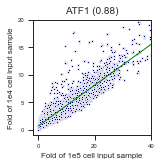

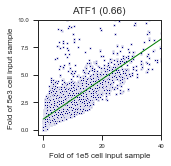

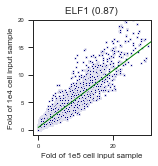

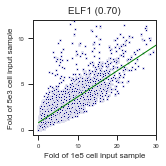

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import copy

regr = LinearRegression()

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 10,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal['ATF1_1e5'],
        capture_signal['ATF1_1e4'],
        s=5,
        color='navy',
        alpha=1,
        #edgecolor=None,
    )
    regr.fit(capture_signal['ATF1_1e5'].values.reshape(-1,1),capture_signal['ATF1_1e4'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal['ATF1_1e5'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal['ATF1_1e5']
    y = capture_signal['ATF1_1e4']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 1e5 cell input sample')
    ax.set_ylabel('Fold of 1e4 cell input sample')
    ax.set_title(f"ATF1 ({est2.rsquared:.2f})")
    ax.set_xlim(-40/20,40)
    ax.set_ylim(-20/20,20)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig3B_ATF1_1e5_1e4.pdf', transparent=True)

    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal['ATF1_1e5'],
        capture_signal['ATF1_5e3'],
        s=5,
        color='navy',
        alpha=1,
        #edgecolor=None,
    )
    regr.fit(capture_signal['ATF1_1e5'].values.reshape(-1,1),capture_signal['ATF1_5e3'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal['ATF1_1e5'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal['ATF1_1e5']
    y = capture_signal['ATF1_5e3']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 1e5 cell input sample')
    ax.set_ylabel('Fold of 5e3 cell input sample')
    ax.set_title(f'ATF1 ({est2.rsquared:.2f})')
    ax.set_xlim(-40/20,40)
    ax.set_ylim(-10/20,10)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig3B_ATF1_1e5_5e3.pdf', transparent=True)
    
    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal['ELF1_1e5'],
        capture_signal['ELF1_1e4'],
        s=5,
        color='navy',
        alpha=1,
        #edgecolor=None,
    )
    regr.fit(capture_signal['ELF1_1e5'].values.reshape(-1,1),capture_signal['ELF1_1e4'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal['ATF1_1e5'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal['ELF1_1e5']
    y = capture_signal['ELF1_1e4']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 1e5 cell input sample')
    ax.set_ylabel('Fold of 1e4 cell input sample')
    ax.set_title(f'ELF1 ({est2.rsquared:.2f})')
    ax.set_xlim(-30/20,30)
    ax.set_ylim(-20/20,20)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig2B_ELF1_1e5_1e4.pdf', transparent=True)
    
    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal['ELF1_1e5'],
        capture_signal['ELF1_5e3'],
        s=5,
        color='navy',
        alpha=1,
        #edgecolor=None,
    )
    regr.fit(capture_signal['ELF1_1e5'].values.reshape(-1,1),capture_signal['ELF1_5e3'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal['ELF1_1e5'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal['ELF1_1e5']
    y = capture_signal['ELF1_5e3']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 1e5 cell input sample')
    ax.set_ylabel('Fold of 5e3 cell input sample')
    ax.set_title(f'ELF1 ({est2.rsquared:.2f})')
    ax.set_xlim(-30/20,30)
    ax.set_ylim(-12/20,12)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig2B_ELF1_1e5_5e3.pdf', transparent=True)

### FlagCR

In [140]:
bw_scan = True

import subprocess
def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold
name = 'hg38_promoter'
capture_regions_file = 'hg38_refGene_promoter.bed'
bigwig_files = [
    'ATF1_FlagCR_1e5.bw', 'ATF1_FlagCR_5e3.bw', 'ELF1_FlagCR_1e5.bw', 'ELF1_FlagCR_5e3.bw',
]
labels = ['ATF1_FlagCR_1e5', 'ATF1_FlagCR_5e3', 'ELF1_FlagCR_1e5', 'ELF1_FlagCR_5e3']
cmd = f'''cut -f 1-3 {capture_regions_file} | awk '{{print $1"\\t"$2"\\t"$3"\\tP"NR}}' > captures_regions.bed'''
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} captures_regions.bed {name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')
capture_regions = pd.read_csv('captures_regions.bed', sep='\t', header=None)
capture_signal_FlagCR = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    avg = get_bigwig_mean(bigwig_file)
    capture_signal_FlagCR[label] = pd.read_csv(
        f'{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean0'] / avg
capture_signal_FlagCR.head()

,ATF1_FlagCR_1e5,ATF1_FlagCR_5e3,ELF1_FlagCR_1e5,ELF1_FlagCR_5e3
P1,9.448370,2.519131,1.984236,2.185440
P2,2.871240,2.625028,3.145542,1.472165
P3,6.179687,2.315481,4.918638,1.810836
P4,1.528129,4.345857,1.434713,3.151678
P5,10.077429,2.918283,5.197456,2.956777


In [141]:
capture_signal_FlagCR.corr()

,ATF1_FlagCR_1e5,ATF1_FlagCR_5e3,ELF1_FlagCR_1e5,ELF1_FlagCR_5e3
ATF1_FlagCR_1e5,1.000000,0.744591,0.738043,0.637452
ATF1_FlagCR_5e3,0.744591,1.000000,0.737652,0.885819
ELF1_FlagCR_1e5,0.738043,0.737652,1.000000,0.765526
ELF1_FlagCR_5e3,0.637452,0.885819,0.765526,1.000000


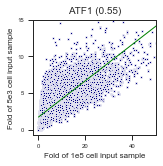

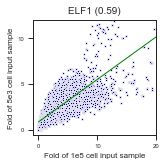

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import copy

regr = LinearRegression()

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 10,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):


    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal_FlagCR['ATF1_FlagCR_1e5'],
        capture_signal_FlagCR['ATF1_FlagCR_5e3'],
        s=5,
        color='navy',
        alpha=1,
        #edgecolor=None,
    )
    regr.fit(capture_signal_FlagCR['ATF1_FlagCR_1e5'].values.reshape(-1,1),capture_signal_FlagCR['ATF1_FlagCR_5e3'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal_FlagCR['ATF1_FlagCR_1e5'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal_FlagCR['ATF1_FlagCR_1e5']
    y = capture_signal_FlagCR['ATF1_FlagCR_5e3']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 1e5 cell input sample')
    ax.set_ylabel('Fold of 5e3 cell input sample')
    ax.set_title(f'ATF1 ({est2.rsquared:.2f})')
    ax.set_xlim(-50/20,50)
    ax.set_ylim(-15/20,15)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig3F_ATF1_FlagCR_1e5_5e3.pdf', transparent=True)
    
    
    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal_FlagCR['ELF1_FlagCR_1e5'],
        capture_signal_FlagCR['ELF1_FlagCR_5e3'],
        s=5,
        color='navy',
        alpha=1,
        #edgecolor=None,
    )
    regr.fit(capture_signal_FlagCR['ELF1_FlagCR_1e5'].values.reshape(-1,1),capture_signal_FlagCR['ELF1_FlagCR_5e3'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal_FlagCR['ELF1_FlagCR_1e5'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal_FlagCR['ELF1_FlagCR_1e5']
    y = capture_signal_FlagCR['ELF1_FlagCR_5e3']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 1e5 cell input sample')
    ax.set_ylabel('Fold of 5e3 cell input sample')
    ax.set_title(f'ELF1 ({est2.rsquared:.2f})')
    ax.set_xlim(-20/20,20)
    ax.set_ylim(-12/20,12)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig3E_ELF1_FlagCR_1e5_5e3.pdf', transparent=True)

## box plot -- Fig.2D S3D

### ATF1


In [34]:

bw_scan = False

import subprocess

def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

name = 'ATF1'
capture_regions_file = 'ATF1_1e5_peaks_excludeIgG.narrowPeak'
bigwig_files = [
    'ATF1_1e5.bw'
]
labels = ['ATF1']
cmd = f'cut -f 1-4 {capture_regions_file} > captures_regions.bed'
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} captures_regions.bed {name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')
capture_regions = pd.read_csv('captures_regions.bed', sep='\t', header=None)
capture_signal = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    avg = get_bigwig_mean(bigwig_file)
    capture_signal[label] = pd.read_csv(
        f'{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean0'] / avg
capture_signal.head()



,ATF1
ATF1_1e5_peak_1,38.895679
ATF1_1e5_peak_4,43.714506
ATF1_1e5_peak_5,71.233796
ATF1_1e5_peak_6,45.845062
ATF1_1e5_peak_7,85.311265


In [35]:
ATF1_ov = pd.read_csv('ATF1_peaks_ov_reduce_input.bed',sep='\t',header=None)
ATF1_ov.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,136692,136811,ATF1_1e5_peak_1,135,.,10.11941,16.92333,13.55167,59,0,0
1,chr1,817273,817393,ATF1_1e5_peak_4,123,.,9.52228,15.62824,12.30306,70,0,0
2,chr1,827295,827778,ATF1_1e5_peak_5,546,.,21.11607,59.10123,54.60751,441,0,0
3,chr1,842867,843042,ATF1_1e5_peak_6,119,.,9.15118,15.29255,11.97950,99,0,0
4,chr1,911264,911434,ATF1_1e5_peak_7,243,.,13.62340,28.06910,24.35725,56,1,1


In [36]:
capture_signal['class'] = [
    '1e5 only' if x == 0 and y == 0 else ('with 1e4' if y == 0 else 'with 5e3')
    for x, y in zip(ATF1_ov[10], ATF1_ov[11])
]


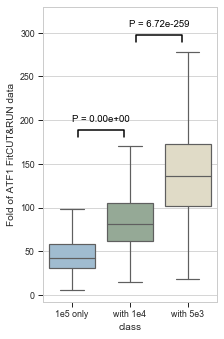

In [37]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 12,
                             'axes.labelsize': 10
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .5, 4.8))
    boxplot(
        x='class',
        y='ATF1',
        data=capture_signal,
        order=['1e5 only', 'with 1e4', 'with 5e3'],
        palette=['#98BDD8', '#92AC93', '#E4DDC3'],
        statistic_args={'statistic_test': 'mannwhitneyu',
            'use_continuity': False,},
        ax=ax,
        showfliers=False,
    )
    ax.set_ylabel('Fold of ATF1 FitCUT&RUN data')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/analysis/figures/Supple_Fig3D_reduce_input_signal_ATF1.pdf', transparent=True)
    

### ELF1

In [38]:

bw_scan = False

import subprocess

def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

name = 'ELF1'
capture_regions_file = 'ELF1_1e5_peaks_excludeIgG.narrowPeak'
bigwig_files = [
    'ELF1_1e5.bw'
]
labels = ['ELF1']
cmd = f'cut -f 1-4 {capture_regions_file} > captures_regions.bed'
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} captures_regions.bed {name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')
capture_regions = pd.read_csv('captures_regions.bed', sep='\t', header=None)
capture_signal = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    avg = get_bigwig_mean(bigwig_file)
    capture_signal[label] = pd.read_csv(
        f'{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean0'] / avg
capture_signal.head()



,ELF1
ELF1_1e5_peak_1,369.649691
ELF1_1e5_peak_4,28.926543
ELF1_1e5_peak_5,33.356790
ELF1_1e5_peak_6,65.380556
ELF1_1e5_peak_7,32.824537


In [39]:
ELF1_ov = pd.read_csv('ELF1_peaks_ov_reduce_input.bed',sep='\t',header=None)
ELF1_ov.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,629909,630010,ELF1_1e5_peak_1,1400,.,30.52444,146.13313,140.01196,30,1,1
1,chr1,817323,817419,ELF1_1e5_peak_4,69,.,6.77818,9.97720,6.93286,21,0,0
2,chr1,826712,826823,ELF1_1e5_peak_5,52,.,5.39991,8.12264,5.21293,71,0,0
3,chr1,827306,827575,ELF1_1e5_peak_6,270,.,13.50946,30.98226,27.01847,136,1,0
4,chr1,842937,843031,ELF1_1e5_peak_7,86,.,7.66775,11.75514,8.60239,54,0,0


In [40]:
capture_signal['class'] = [
    '1e5 only' if x == 0 and y == 0 else ('with 1e4' if y == 0 else 'with 5e3')
    for x, y in zip(ELF1_ov[10], ELF1_ov[11])
]


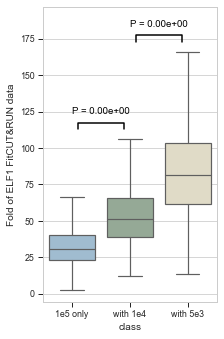

In [41]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 12,
                             'axes.labelsize': 10
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .5, 4.8))
    boxplot(
        x='class',
        y='ELF1',
        data=capture_signal,
        order=['1e5 only', 'with 1e4', 'with 5e3'],
        palette=['#98BDD8', '#92AC93', '#E4DDC3'],
        statistic_args={'statistic_test': 'mannwhitneyu',
            'use_continuity': False,},
        ax=ax,
        showfliers=False,
    )
    ax.set_ylabel('Fold of ELF1 FitCUT&RUN data')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/analysis/figures/Fig2D_reduce_input_signal_ELF1.pdf', transparent=True)